In [1]:
##This is to analyze the sequences I get back from the libraries and eventually plot in PyMol figures. I am going to import the
##Nucleotide alignment after exporting a FASTA file from Geneious. This is made by aligning the chromatograms from Sanger reads.

#Importing the necessary libraries
import sys
from os import listdir
from os.path import isfile, join

import re

import pandas as pd

import Bio
from Bio import AlignIO
from Bio import SeqUtils

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import kendalltau

#Setting matplotlib to be inline, and setting the fonttype for the pdf export to be consistent in Illustrator.
%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Set the root directory
root_dir = './Data';

In [2]:
###Classes defined###
class FASTAClass:
    def __init__(self, id, seq):        
        self.id = id        
        self.seq = seq

###Functions used here###
def sequenceCleaner(mutants):
    # Create our hash table to add the sequences
    seqHash={}
    seqUnique = []

    # Using the Biopython fasta parse we can read our fasta input
    for seq_record in mutants[1:]:
        # Take the current sequence
        sequence = str(seq_record.seq).upper()
        # If the sequence passed in the test "is it clean?" and it isn't in the
        # hash table, the sequence and its id are going to be in the hash
        if sequence not in seqHash:
            seqHash[sequence] = seq_record.id
        # If it is already in the hash table, we're just gonna concatenate the ID
        # of the current sequence to another one that is already in the hash table
        else:
            seqHash[sequence] += "_" + seq_record.id.split("_")[-3].split("-")[-1]
    
    # Making the final FASTAClass for the unique sequences
    seqUnique.append(FASTAClass(mutants[0].id, mutants[0].seq))
    for sequence in seqHash:
        seqUnique.append(FASTAClass(seqHash[sequence], sequence))
            
    return seqUnique

In [3]:
#Set the data directory
data_dir = '';

#Pick a test data file
data_file = root_dir+data_dir
#print(root_dir+data_dir)

#Printing file list
fileList = [f for f in listdir(root_dir+data_dir) if (f.endswith(".csv"))]
print("Sequence files:")
print("\n".join(fileList))

Sequence files:
E05973_TMH10-12_v1-v2-sort04-05-05a_v3-sort04a-05_v4-sort04_all_mutantCounts.csv
E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all_mutantCounts.csv
Fungiv2p1_hmmalign-hhfilter_graphs.csv
mutantCountsPyMol.csv
plateSeq03_E05973_TMH10-12_Mutlib-v1-v2-s04b_corrected_mutantCounts.csv
pySCA-6_Fungiv2p1_hmmalign_hhfilter_Di.csv
SergeyMIscriptFungiv2p1_hmmalign_hhfilter_H.csv
Single-mut_Autocrine-uniqueMutPos_190501.csv
_mutantCounts.csv


In [4]:
read_file = data_file+"/Single-mut_Autocrine-uniqueMutPos_190501.csv"
singleMutUniqueMutPos = pd.read_csv(read_file)
print(singleMutUniqueMutPos.columns)
print(singleMutUniqueMutPos.columns)

Index(['Sample', 'clone', 'Autocrine', 'Expression', 'Mutations/position',
       'Norm. Mut/pos'],
      dtype='object')
Index(['Sample', 'clone', 'Autocrine', 'Expression', 'Mutations/position',
       'Norm. Mut/pos'],
      dtype='object')


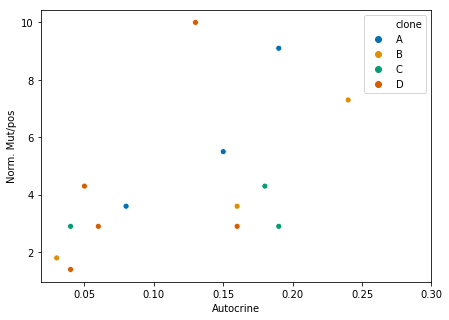

In [15]:
fig1 = figure(figsize=(7,5))

ax1 = sns.scatterplot(x="Autocrine", y="Norm. Mut/pos", hue="clone", data=singleMutUniqueMutPos, palette="colorblind", legend='brief')
#ax1.set(xscale='log')
ax1.set_xlim(right=0.30)

#savefig(root_dir+'/SingleMut_Autocrine-vs-MutPos_190503.pdf', dpi=300, transparent=True)